In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [2]:
#Got this code from cited reference [13] in listed references in README
def sentiment_scores(index, row):
    # Extract Content, Author Name, Date, Rating
    sentence = row["Content"]
    name = row["Author Name"]
    title = row['Title']
    review_date = row["Date"]
    review_year = row["Year"]
    rating = row["Rating"]

    # Create a SentimentIntensityAnalyzer object
    sid_obj = SentimentIntensityAnalyzer()

    # Get sentiment scores
    sentiment_dict = sid_obj.polarity_scores(sentence)

    # Determine overall sentiment
    if sentiment_dict['compound'] >= 0.05:
        sentiment_label = "Positive"
    elif sentiment_dict['compound'] <= -0.05:
        sentiment_label = "Negative"
    else:
        sentiment_label = "Neutral"

    # Return sentiment results as a Series (so it's added as columns in the original DataFrame)
    return pd.Series({
        "Sentiment Overall": sentiment_label,
        "Negative Score": sentiment_dict['neg'],
        "Neutral Score": sentiment_dict['neu'],
        "Positive Score": sentiment_dict['pos'],
        "Overall Percentage Score": sentiment_dict['compound']
    })

In [3]:
FF6_clean2013_2 = pd.read_csv('/Users/borayadiul/DS-4002-Group-Projects/DATA/Cleaned Data/FF6_clean2013_2.csv')

In [4]:
# Vader analysis on FF6 2013 movies
FF6_clean2013_2[["Sentiment Overall", "Negative Score", "Neutral Score", "Positive Score", "Overall Percentage Score"]] = FF6_clean2013_2.apply(lambda row: sentiment_scores(row.name, row), axis=1)
FF6_2013_vader = FF6_clean2013_2
FF6_2013_vader

,Unnamed: 0,Rating,Title,Content,Author Name,Date,Year,Sentiment Overall,Negative Score,Neutral Score,Positive Score,Overall Percentage Score
0,243,10,You Love Cars? Fun? Action?? You have to SEE t...,After watching the trailer you go to the cinem...,illmor-814-204784,2013-05-23,2013,Positive,0.034,0.637,0.330,0.9964
1,127,8,Just when we thought that it couldn't get bigger,"""The Rock"" is not the only one who got bigger....",damh_frikinlater,2013-05-23,2013,Negative,0.092,0.816,0.093,-0.7953
2,137,8,A spectacular action fest with emotional depth,"Get the wheels rolling and adrenaline pumping,...",vishalsmail33,2013-05-23,2013,Negative,0.123,0.780,0.098,-0.5099
3,199,8,Best Fast ever made.,This was certainly best movie in Fast And The ...,amitsingh2783,2013-05-23,2013,Positive,0.093,0.741,0.167,0.8371
4,43,7,"Simple, kinda solid and a hole lot of crazy ac...","My first thought of all this was, when I came ...",notaufo,2013-05-23,2013,Positive,0.060,0.693,0.246,0.9984
...,...,...,...,...,...,...,...,...,...,...,...,...
202,330,5,I Couldn't Park Realism for Fantasy...Sorry.,"Dispense With Credible Story, Quality Acting�A...",AudioFileZ,2013-06-20,2013,Positive,0.109,0.697,0.194,0.9948
203,320,9,Furious Frenzy,My mind almost exploded many times throughout ...,FilmGamer,2013-06-21,2013,Positive,0.044,0.865,0.091,0.9484
204,59,7,Just A Bad Film,"So much for the old phrase ""quit while you're ...",megaknocker,2013-06-22,2013,Negative,0.172,0.784,0.044,-0.9163
205,346,7,"fast6, then a 7?","Okay when the original ""fast and the furious"" ...",hawaiiwarrior08,2013-06-23,2013,Negative,0.176,0.733,0.091,-0.9721


In [6]:
FF6_2013_vader.to_csv('FF6_2013_vader.csv')
FF6_2013_vader


,Unnamed: 0,Rating,Title,Content,Author Name,Date,Year,Sentiment Overall,Negative Score,Neutral Score,Positive Score,Overall Percentage Score
0,243,10,You Love Cars? Fun? Action?? You have to SEE t...,After watching the trailer you go to the cinem...,illmor-814-204784,2013-05-23,2013,Positive,0.034,0.637,0.330,0.9964
1,127,8,Just when we thought that it couldn't get bigger,"""The Rock"" is not the only one who got bigger....",damh_frikinlater,2013-05-23,2013,Negative,0.092,0.816,0.093,-0.7953
2,137,8,A spectacular action fest with emotional depth,"Get the wheels rolling and adrenaline pumping,...",vishalsmail33,2013-05-23,2013,Negative,0.123,0.780,0.098,-0.5099
3,199,8,Best Fast ever made.,This was certainly best movie in Fast And The ...,amitsingh2783,2013-05-23,2013,Positive,0.093,0.741,0.167,0.8371
4,43,7,"Simple, kinda solid and a hole lot of crazy ac...","My first thought of all this was, when I came ...",notaufo,2013-05-23,2013,Positive,0.060,0.693,0.246,0.9984
...,...,...,...,...,...,...,...,...,...,...,...,...
202,330,5,I Couldn't Park Realism for Fantasy...Sorry.,"Dispense With Credible Story, Quality Acting�A...",AudioFileZ,2013-06-20,2013,Positive,0.109,0.697,0.194,0.9948
203,320,9,Furious Frenzy,My mind almost exploded many times throughout ...,FilmGamer,2013-06-21,2013,Positive,0.044,0.865,0.091,0.9484
204,59,7,Just A Bad Film,"So much for the old phrase ""quit while you're ...",megaknocker,2013-06-22,2013,Negative,0.172,0.784,0.044,-0.9163
205,346,7,"fast6, then a 7?","Okay when the original ""fast and the furious"" ...",hawaiiwarrior08,2013-06-23,2013,Negative,0.176,0.733,0.091,-0.9721


In [ ]:
# FF6 movies post 10 years

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [8]:
#Got this code from cited reference [13] in listed references in README
def sentiment_scores(index, row):
    # Extract Content, Author Name, Date, Rating
    sentence = row["Content"]
    name = row["Author Name"]
    title = row['Title']
    review_date = row["Date"]
    review_year = row["Year"]
    rating = row["Rating"]

    # Create a SentimentIntensityAnalyzer object
    sid_obj = SentimentIntensityAnalyzer()

    # Get sentiment scores
    sentiment_dict = sid_obj.polarity_scores(sentence)

    # Determine overall sentiment
    if sentiment_dict['compound'] >= 0.05:
        sentiment_label = "Positive"
    elif sentiment_dict['compound'] <= -0.05:
        sentiment_label = "Negative"
    else:
        sentiment_label = "Neutral"

    # Return sentiment results as a Series (so it's added as columns in the original DataFrame)
    return pd.Series({
        "Sentiment Overall": sentiment_label,
        "Negative Score": sentiment_dict['neg'],
        "Neutral Score": sentiment_dict['neu'],
        "Positive Score": sentiment_dict['pos'],
        "Overall Percentage Score": sentiment_dict['compound']
    })

In [19]:
FF6_clean_dec2 = pd.read_csv('/Users/borayadiul/DS-4002-Group-Projects/Scripts/FF6_clean_dec2.csv')
FF6_clean_dec2

,Unnamed: 0,Rating,Title,Content,Author Name,Date,Year
0,0,9.0,Superb ACTION movie!,Fast and Furious 6 is an exciting action movie...,daniel_roettger,2023-03-24,2023
1,1,5.0,The Road To Fast X,Fast & Furious 6 was released In 2013\nThis in...,jasonmichaeld,2023-04-08,2023
2,2,8.0,Impressive action sequences,The follow up sequel to the critically acclaim...,Floated2,2023-04-12,2023
3,3,8.0,Fast & Furious 6 Was An Improvement After The ...,Fast & Furious 6 was an improvement after the ...,HabibieHakim123,2023-04-15,2023
4,4,6.0,Enjoyable,The last film in the franchise released in Pau...,ashfordofficial,2023-05-07,2023
5,5,7.0,"Entertaining, but a letdown from Fast 5","It's great having all of the ""family "" returni...",ThereelscoopwithKK,2023-05-09,2023
6,6,7.0,Maybe the best in the franchise,Five was the movie that changed the direction ...,Jithindurden,2023-05-09,2023
7,7,6.0,Furious 6,"I really quite enjoyed F&F5 (2011), but this o...",CinemaSerf,2023-05-15,2023
8,8,8.0,Over the top action sequences better seen on t...,(2013) Fast And Furious 6\nACTION ADVENTUREThe...,jordondave-28085,2023-05-16,2023
9,9,6.0,The one with the longest runway ever,"From an action perspective, ""Fast & Furious 6""...",jace_the_film_guy,2023-05-16,2023


In [20]:
# Vader analysis on FF6 2013 movies
FF6_clean_dec2[["Sentiment Overall", "Negative Score", "Neutral Score", "Positive Score", "Overall Percentage Score"]] = FF6_clean_dec2.apply(lambda row: sentiment_scores(row.name, row), axis=1)
FF6_dec_vader = FF6_clean_dec2
FF6_dec_vader

,Unnamed: 0,Rating,Title,Content,Author Name,Date,Year,Sentiment Overall,Negative Score,Neutral Score,Positive Score,Overall Percentage Score
0,0,9.0,Superb ACTION movie!,Fast and Furious 6 is an exciting action movie...,daniel_roettger,2023-03-24,2023,Positive,0.062,0.848,0.090,0.5346
1,1,5.0,The Road To Fast X,Fast & Furious 6 was released In 2013\nThis in...,jasonmichaeld,2023-04-08,2023,Negative,0.312,0.688,0.000,-0.9936
2,2,8.0,Impressive action sequences,The follow up sequel to the critically acclaim...,Floated2,2023-04-12,2023,Positive,0.064,0.825,0.111,0.7992
3,3,8.0,Fast & Furious 6 Was An Improvement After The ...,Fast & Furious 6 was an improvement after the ...,HabibieHakim123,2023-04-15,2023,Positive,0.030,0.821,0.149,0.9468
4,4,6.0,Enjoyable,The last film in the franchise released in Pau...,ashfordofficial,2023-05-07,2023,Negative,0.145,0.855,0.000,-0.9300
5,5,7.0,"Entertaining, but a letdown from Fast 5","It's great having all of the ""family "" returni...",ThereelscoopwithKK,2023-05-09,2023,Positive,0.054,0.813,0.133,0.9714
6,6,7.0,Maybe the best in the franchise,Five was the movie that changed the direction ...,Jithindurden,2023-05-09,2023,Positive,0.054,0.834,0.111,0.9507
7,7,6.0,Furious 6,"I really quite enjoyed F&F5 (2011), but this o...",CinemaSerf,2023-05-15,2023,Negative,0.113,0.816,0.070,-0.8727
8,8,8.0,Over the top action sequences better seen on t...,(2013) Fast And Furious 6\nACTION ADVENTUREThe...,jordondave-28085,2023-05-16,2023,Negative,0.112,0.778,0.110,-0.6611
9,9,6.0,The one with the longest runway ever,"From an action perspective, ""Fast & Furious 6""...",jace_the_film_guy,2023-05-16,2023,Positive,0.050,0.754,0.195,0.9736


In [21]:
FF6_dec_vader.to_csv('FF6_dec_vader.csv')
FF6_dec_vader


,Unnamed: 0,Rating,Title,Content,Author Name,Date,Year,Sentiment Overall,Negative Score,Neutral Score,Positive Score,Overall Percentage Score
0,0,9.0,Superb ACTION movie!,Fast and Furious 6 is an exciting action movie...,daniel_roettger,2023-03-24,2023,Positive,0.062,0.848,0.090,0.5346
1,1,5.0,The Road To Fast X,Fast & Furious 6 was released In 2013\nThis in...,jasonmichaeld,2023-04-08,2023,Negative,0.312,0.688,0.000,-0.9936
2,2,8.0,Impressive action sequences,The follow up sequel to the critically acclaim...,Floated2,2023-04-12,2023,Positive,0.064,0.825,0.111,0.7992
3,3,8.0,Fast & Furious 6 Was An Improvement After The ...,Fast & Furious 6 was an improvement after the ...,HabibieHakim123,2023-04-15,2023,Positive,0.030,0.821,0.149,0.9468
4,4,6.0,Enjoyable,The last film in the franchise released in Pau...,ashfordofficial,2023-05-07,2023,Negative,0.145,0.855,0.000,-0.9300
5,5,7.0,"Entertaining, but a letdown from Fast 5","It's great having all of the ""family "" returni...",ThereelscoopwithKK,2023-05-09,2023,Positive,0.054,0.813,0.133,0.9714
6,6,7.0,Maybe the best in the franchise,Five was the movie that changed the direction ...,Jithindurden,2023-05-09,2023,Positive,0.054,0.834,0.111,0.9507
7,7,6.0,Furious 6,"I really quite enjoyed F&F5 (2011), but this o...",CinemaSerf,2023-05-15,2023,Negative,0.113,0.816,0.070,-0.8727
8,8,8.0,Over the top action sequences better seen on t...,(2013) Fast And Furious 6\nACTION ADVENTUREThe...,jordondave-28085,2023-05-16,2023,Negative,0.112,0.778,0.110,-0.6611
9,9,6.0,The one with the longest runway ever,"From an action perspective, ""Fast & Furious 6""...",jace_the_film_guy,2023-05-16,2023,Positive,0.050,0.754,0.195,0.9736


In [22]:
# These are now the 2 sample t-test analysis

import numpy as np
import scipy.stats as stats

# Extract the overall sentiment scores from both datasets
sentiment_FF62013 = np.array(FF6_2013_vader["Overall Percentage Score"]) 
sentiment_FF6dec = np.array(FF6_dec_vader["Overall Percentage Score"]) 

# Print variance of both groups (checking assumption of equal variance)
var_FF62013 = np.var(sentiment_FF62013, ddof=1)  # Sample variance (ddof=1 for unbiased estimate)
var_FF6dec = np.var(sentiment_FF6dec, ddof=1)

print(f"Variance of 2013 Sentiment Scores: {var_FF62013:.4f}")
print(f"Variance of 2023-2025 Sentiment Scores: {var_FF6dec:.4f}")

# Perform the two-sample t-test (Welch’s t-test since variances might be unequal)
t_stat, p_value = stats.ttest_ind(sentiment_FF62013, sentiment_FF6dec, equal_var=False)

# Display results
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in sentiment between 2011 and 2021-2025.")
else:
    print("Fail to reject the null hypothesis: No significant difference in sentiment.")


Variance of 2013 Sentiment Scores: 0.5488
Variance of 2023-2024 Sentiment Scores: 0.5257
T-statistic: 0.5231
P-value: 0.6025
Fail to reject the null hypothesis: No significant difference in sentiment.


In [23]:
# Group by the 'Year' column and calculate the mean of 'Overall Percentage Score'
avg_sentiment_FF62013 = FF6_2013_vader['Overall Percentage Score'].mean()
avg_sentiment_FF6dec = FF6_dec_vader['Overall Percentage Score'].mean()

print(f"Average sentiment score for 2011: {avg_sentiment_FF62013}")
print(f"Average sentiment score for 2021 - 2025: {avg_sentiment_FF6dec}")

Average sentiment score for 2011: 0.5241019323671497
Average sentiment score for 2021 - 2024: 0.46359183673469384


Correlation coefficient: 0.42, p-value: 0.00000


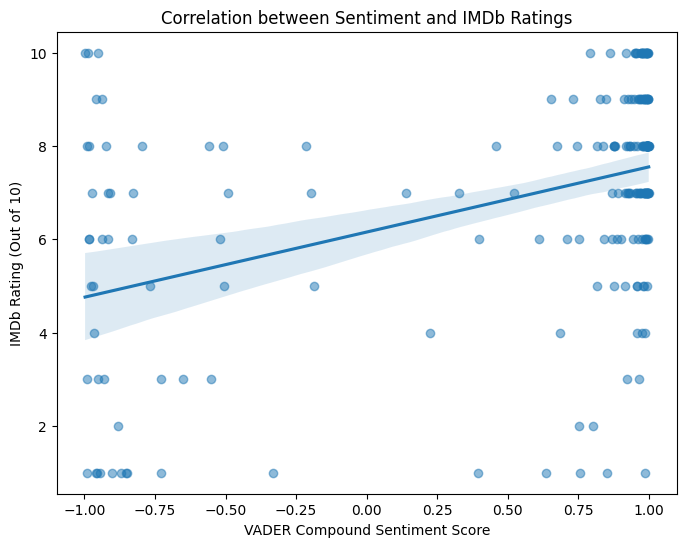

In [1]:
# Now to look at the correlations for first four weeks reviews

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

FF6_2013_vader = pd.read_csv('/Users/borayadiul/DS-4002-Group-Projects-1/DATA/Cleaned Data/Vader Included Datasets/FF6_2013_vader.csv')

# Compute correlation
correlation, p_value = stats.pearsonr(FF6_2013_vader["Overall Percentage Score"], FF6_2013_vader["Rating"])
print(f"Correlation coefficient: {correlation:.2f}, p-value: {p_value:.5f}")

# Scatter plot
plt.figure(figsize=(8,6))
sns.regplot(x=FF6_2013_vader["Overall Percentage Score"], y=FF6_2013_vader["Rating"], scatter_kws={'alpha':0.5})
plt.xlabel("VADER Compound Sentiment Score")
plt.ylabel("IMDb Rating (Out of 10)")
plt.title("Correlation between Sentiment and IMDb Ratings")
plt.show()

Correlation coefficient: 0.37, p-value: 0.00970


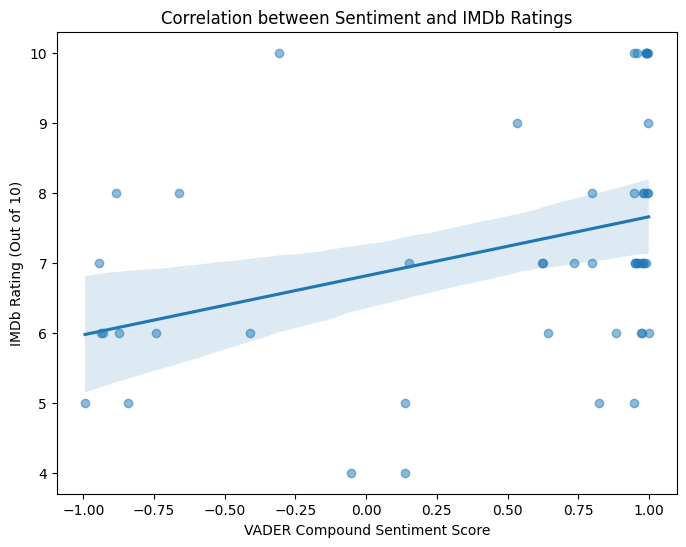

In [2]:
# Now to look at the correlations for first four weeks reviews

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

FF6_dec_vader = pd.read_csv('/Users/borayadiul/DS-4002-Group-Projects-1/DATA/Cleaned Data/Vader Included Datasets/FF6_dec_vader.csv')

# Compute correlation
correlation, p_value = stats.pearsonr(FF6_dec_vader["Overall Percentage Score"], FF6_dec_vader["Rating"])
print(f"Correlation coefficient: {correlation:.2f}, p-value: {p_value:.5f}")

# Scatter plot
plt.figure(figsize=(8,6))
sns.regplot(x=FF6_dec_vader["Overall Percentage Score"], y=FF6_dec_vader["Rating"], scatter_kws={'alpha':0.5})
plt.xlabel("VADER Compound Sentiment Score")
plt.ylabel("IMDb Rating (Out of 10)")
plt.title("Correlation between Sentiment and IMDb Ratings")
plt.show()